<div>
    <img src="images/emlyon.png" style="height:60px; float:left; padding-right:10px; margin-top:5px" />
    <span>
        <h1 style="padding-bottom:5px;"> Smart Supply Chain </h1>
        <a href="https://masters.em-lyon.com/fr/msc-in-data-science-artificial-intelligence-strategy">[Emlyon]</a> MSc in Data Science & Artificial Intelligence Strategy (DSAIS) <br/>
         February 2023, Paris | © Saeed VARASTEH
    </span>
</div>

### Part 05 - Exercises 02 : The Forecast Competition

---
<img src="images/competition.png" style="width:100px; position:absolute; top:-10px; right:0;"/>

__Objective__: Predict three months of item sales at different stores.

__Dataset description__

You are given a file named `store_sales.csv`:

    date - Date
    store - Store ID
    item - Item ID
    sales - Number of items sold at a particular store on a particular date.
    


### Import data and modules

#### Import modules

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

#### Import data

In [71]:
sales = pd.read_csv('./data/store/store_sales.csv')
print(sales.shape)
sales.head(5)

(913000, 4)


,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


## <span style="color:steelblue;">  Data Exploration  </span>


#### The data in the sales dataset are from which period?

__Hint:__ find the minimum and the maximum of the date.<br/>
__Hint:__ do not forget to convert the `date` column into datetime.

In [72]:
sales.dtypes

date     object
store     int64
item      int64
sales     int64
dtype: object

In [73]:
sales['date'] = pd.to_datetime(sales['date'],yearfirst=True, format='%Y/%m/%d')

In [74]:
sales.dtypes

date     datetime64[ns]
store             int64
item              int64
sales             int64
dtype: object

In [75]:
print(sales.min())
print(sales.max())

date     2013-01-01 00:00:00
store                      1
item                       1
sales                      0
dtype: object
date     2017-12-31 00:00:00
store                     10
item                      50
sales                    231
dtype: object


#### How many unique items and stores are in the dataset?

In [76]:
sales['item'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

In [77]:
sales['store'].value_counts()

1     91300
2     91300
3     91300
4     91300
5     91300
6     91300
7     91300
8     91300
9     91300
10    91300
Name: store, dtype: int64

#### Plot average monthly sales for the item_id == 10 at store_id == 1

In [78]:
df_item = sales[(sales['item'] == 10) & (sales['store']==1)].set_index("date")
df_item = df_item.resample('M').mean()

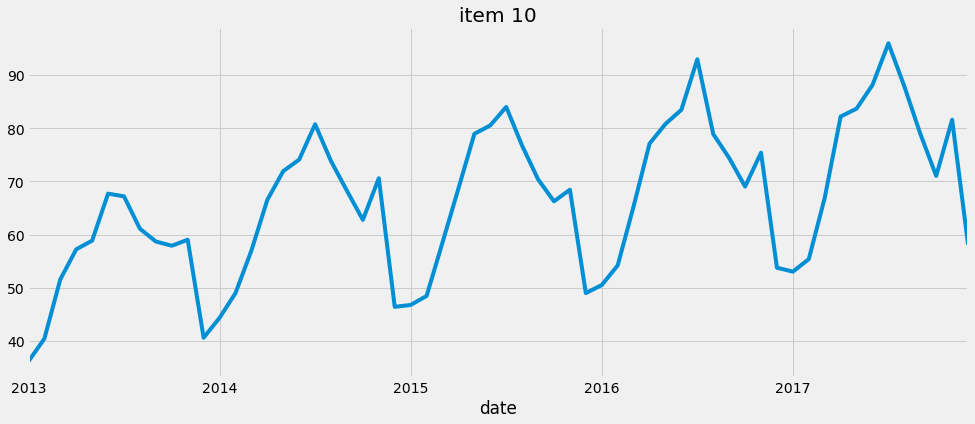

In [79]:
fig = plt.figure(figsize=(15, 6))
df_item['sales'].plot(kind="line", title="item 10");

---

## <span style="color:steelblue;">  Machine Learning for Time Series Forecasting  </span>


### <span style="color:DarkGray;">  Data preprocessing and Feature engineering  </span>

#### Extract some useful features (e.g. lag, rolling mean, datetime) to use in a machine learning model and them to the `sales` DataFrame.

In [80]:
sales.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [81]:
sales["lag_28"] = sales[["store","item","sales"]].groupby(["store","item"])["sales"].shift(28)
sales["lag_28_2"] = sales[["store","sales"]].groupby(["store"])["sales"].shift(28)
sales["lag_28_3"] = sales[["item","sales"]].groupby(["item"])["sales"].shift(28)

In [82]:
sales["rmean_7"] = sales[["store","item","sales"]].groupby(["store","item"])["sales"].transform(lambda x : x.rolling(7).mean())
sales["rmean_7_2"] = sales[["store","sales"]].groupby(["store"])["sales"].transform(lambda x : x.rolling(7).mean())
sales["rmean_7_3"] = sales[["item","sales"]].groupby(["item"])["sales"].transform(lambda x : x.rolling(7).mean())

In [83]:
#sales["rmean_14"] = sales[["store","item","sales"]].groupby(["store","item"])["sales"].transform(lambda x : x.rolling(14).mean())

In [84]:
sales["rmean_28_7"] = sales[["store","item","lag_28"]].groupby(["store","item"])["lag_28"].transform(lambda x : x.rolling(7).mean())
#sales["rmean_28_7_2"] = sales[["store","lag_28_2"]].groupby(["store"])["lag_28_2"].transform(lambda x : x.rolling(7).mean())
#sales["rmean_28_7_3"] = sales[["item","lag_28_3"]].groupby(["item"])["lag_28_3"].transform(lambda x : x.rolling(7).mean())

In [85]:
#mean_sales = sales.groupby(["item","store","date"])["sales"].transform('mean')
#daily_sales = sales.groupby(["item","store","date"])["sales"].transform('mean')
#sales["sell_trend"] = (daily_sales - mean_sales).astype(np.float16)

In [86]:
sales["rmax_7"] = sales[["store","item","sales"]].groupby(["store","item"])["sales"].transform(lambda x: x.rolling(window=7).max()).astype(np.float16)
#sales["rmax_7_2"] = sales[["store","sales"]].groupby(["store"])["sales"].transform(lambda x: x.rolling(window=7).max()).astype(np.float16)
#sales["rmax_7_3"] = sales[["item","sales"]].groupby(["item"])["sales"].transform(lambda x: x.rolling(window=7).max()).astype(np.float16)

In [87]:
sales["rmin_7"] = sales[["store","item","sales"]].groupby(["store","item"])["sales"].transform(lambda x: x.rolling(window=7).min()).astype(np.float16)

In [88]:
sales.head()

,date,store,item,sales,lag_28,lag_28_2,lag_28_3,rmean_7,rmean_7_2,rmean_7_3,rmean_28_7,rmax_7,rmin_7
0,2013-01-01,1,1,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,1,1,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-03,1,1,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-04,1,1,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-05,1,1,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
sales['date'] = pd.to_datetime(sales['date'])
sales.dtypes

date          datetime64[ns]
store                  int64
item                   int64
sales                  int64
lag_28               float64
lag_28_2             float64
lag_28_3             float64
rmean_7              float64
rmean_7_2            float64
rmean_7_3            float64
rmean_28_7           float64
rmax_7               float16
rmin_7               float16
dtype: object

In [90]:
sales['quarter'] = sales['date'].dt.quarter.astype("int16")
sales['month'] = sales['date'].dt.month.astype("int16")
sales['day'] = sales['date'].dt.day.astype("int16")
sales['week'] = sales['date'].dt.weekofyear.astype("int16")
sales['weekday'] = sales['date'].dt.weekday.astype("int16")
print("Done")

Done


In [91]:
sales.isnull().sum()

date              0
store             0
item              0
sales             0
lag_28        14000
lag_28_2        280
lag_28_3       1400
rmean_7        3000
rmean_7_2        60
rmean_7_3       300
rmean_28_7    17000
rmax_7         3000
rmin_7         3000
quarter           0
month             0
day               0
week              0
weekday           0
dtype: int64

In [92]:
sales.shape

(913000, 18)

In [93]:
sales.dropna(inplace = True)

In [94]:
sales.isnull().sum()

date          0
store         0
item          0
sales         0
lag_28        0
lag_28_2      0
lag_28_3      0
rmean_7       0
rmean_7_2     0
rmean_7_3     0
rmean_28_7    0
rmax_7        0
rmin_7        0
quarter       0
month         0
day           0
week          0
weekday       0
dtype: int64

In [95]:
sales.shape

(896000, 18)

### <span style="color:DarkGray;">  Train and test split  </span>

#### Split sales data into the __train__ and __test__ datasets. 

In [96]:
split_date = "2017-10-01"

In [97]:
train = sales.loc[sales.date < split_date].copy()
test = sales.loc[sales.date >= split_date].copy()

In [98]:
print(train.shape)
print(test.shape)

(850000, 18)
(46000, 18)


In [99]:
train

,date,store,item,sales,lag_28,lag_28_2,lag_28_3,rmean_7,rmean_7_2,rmean_7_3,rmean_28_7,rmax_7,rmin_7,quarter,month,day,week,weekday
34,2013-02-04,1,1,14,10.0,10.0,10.0,12.714286,12.714286,12.714286,11.857143,21.0,6.0,1,2,4,6,0
35,2013-02-05,1,1,9,9.0,9.0,9.0,13.142857,13.142857,13.142857,11.285714,21.0,9.0,1,2,5,6,1
36,2013-02-06,1,1,10,12.0,12.0,12.0,13.285714,13.285714,13.285714,11.428571,21.0,9.0,1,2,6,6,2
37,2013-02-07,1,1,13,9.0,9.0,9.0,13.285714,13.285714,13.285714,10.714286,21.0,9.0,1,2,7,6,3
38,2013-02-08,1,1,11,9.0,9.0,9.0,13.285714,13.285714,13.285714,10.142857,21.0,9.0,1,2,8,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912903,2017-09-26,10,50,79,79.0,79.0,79.0,85.142857,85.142857,85.142857,96.571429,99.0,63.0,3,9,26,39,1
912904,2017-09-27,10,50,80,79.0,79.0,79.0,86.285714,86.285714,86.285714,93.000000,99.0,63.0,3,9,27,39,2
912905,2017-09-28,10,50,82,89.0,89.0,89.0,85.285714,85.285714,85.285714,93.000000,99.0,63.0,3,9,28,39,3
912906,2017-09-29,10,50,90,96.0,96.0,96.0,84.285714,84.285714,84.285714,92.714286,99.0,63.0,3,9,29,39,4


In [100]:
test

,date,store,item,sales,lag_28,lag_28_2,lag_28_3,rmean_7,rmean_7_2,rmean_7_3,rmean_28_7,rmax_7,rmin_7,quarter,month,day,week,weekday
1734,2017-10-01,1,1,21,23.0,23.0,23.0,23.000000,23.000000,23.000000,24.428571,30.0,14.0,4,10,1,39,6
1735,2017-10-02,1,1,12,12.0,12.0,12.0,22.714286,22.714286,22.714286,24.000000,30.0,12.0,4,10,2,40,0
1736,2017-10-03,1,1,18,26.0,26.0,26.0,22.714286,22.714286,22.714286,24.714286,30.0,12.0,4,10,3,40,1
1737,2017-10-04,1,1,15,24.0,24.0,24.0,21.000000,21.000000,21.000000,25.000000,30.0,12.0,4,10,4,40,2
1738,2017-10-05,1,1,20,29.0,29.0,29.0,20.571429,20.571429,20.571429,25.428571,30.0,12.0,4,10,5,40,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912995,2017-12-27,10,50,63,76.0,76.0,76.0,62.714286,62.714286,62.714286,82.571429,76.0,41.0,4,12,27,52,2
912996,2017-12-28,10,50,59,73.0,73.0,73.0,62.142857,62.142857,62.142857,80.571429,76.0,41.0,4,12,28,52,3
912997,2017-12-29,10,50,74,66.0,66.0,66.0,62.000000,62.000000,62.000000,78.428571,76.0,41.0,4,12,29,52,4
912998,2017-12-30,10,50,62,49.0,49.0,49.0,60.857143,60.857143,60.857143,74.285714,76.0,41.0,4,12,30,52,5


#### Create input (`x`) and output (`y`) variables
Note: use __sales__ as the output column.

In [101]:
x_train = train.drop(columns=["sales","date"])
y_train = train["sales"]
x_test = test.drop(columns=["sales","date"])
y_test = test["sales"]

In [102]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(850000, 16) (850000,)
(46000, 16) (46000,)


In [103]:
x_train

,store,item,lag_28,lag_28_2,lag_28_3,rmean_7,rmean_7_2,rmean_7_3,rmean_28_7,rmax_7,rmin_7,quarter,month,day,week,weekday
34,1,1,10.0,10.0,10.0,12.714286,12.714286,12.714286,11.857143,21.0,6.0,1,2,4,6,0
35,1,1,9.0,9.0,9.0,13.142857,13.142857,13.142857,11.285714,21.0,9.0,1,2,5,6,1
36,1,1,12.0,12.0,12.0,13.285714,13.285714,13.285714,11.428571,21.0,9.0,1,2,6,6,2
37,1,1,9.0,9.0,9.0,13.285714,13.285714,13.285714,10.714286,21.0,9.0,1,2,7,6,3
38,1,1,9.0,9.0,9.0,13.285714,13.285714,13.285714,10.142857,21.0,9.0,1,2,8,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912903,10,50,79.0,79.0,79.0,85.142857,85.142857,85.142857,96.571429,99.0,63.0,3,9,26,39,1
912904,10,50,79.0,79.0,79.0,86.285714,86.285714,86.285714,93.000000,99.0,63.0,3,9,27,39,2
912905,10,50,89.0,89.0,89.0,85.285714,85.285714,85.285714,93.000000,99.0,63.0,3,9,28,39,3
912906,10,50,96.0,96.0,96.0,84.285714,84.285714,84.285714,92.714286,99.0,63.0,3,9,29,39,4


In [104]:
x_test

,store,item,lag_28,lag_28_2,lag_28_3,rmean_7,rmean_7_2,rmean_7_3,rmean_28_7,rmax_7,rmin_7,quarter,month,day,week,weekday
1734,1,1,23.0,23.0,23.0,23.000000,23.000000,23.000000,24.428571,30.0,14.0,4,10,1,39,6
1735,1,1,12.0,12.0,12.0,22.714286,22.714286,22.714286,24.000000,30.0,12.0,4,10,2,40,0
1736,1,1,26.0,26.0,26.0,22.714286,22.714286,22.714286,24.714286,30.0,12.0,4,10,3,40,1
1737,1,1,24.0,24.0,24.0,21.000000,21.000000,21.000000,25.000000,30.0,12.0,4,10,4,40,2
1738,1,1,29.0,29.0,29.0,20.571429,20.571429,20.571429,25.428571,30.0,12.0,4,10,5,40,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912995,10,50,76.0,76.0,76.0,62.714286,62.714286,62.714286,82.571429,76.0,41.0,4,12,27,52,2
912996,10,50,73.0,73.0,73.0,62.142857,62.142857,62.142857,80.571429,76.0,41.0,4,12,28,52,3
912997,10,50,66.0,66.0,66.0,62.000000,62.000000,62.000000,78.428571,76.0,41.0,4,12,29,52,4
912998,10,50,49.0,49.0,49.0,60.857143,60.857143,60.857143,74.285714,76.0,41.0,4,12,30,52,5


### <span style="color:DarkGray;"> Model training and validation </span>

#### Train a  model on the train and validate your model on the test dataset (report your SMAPE score)

In [105]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

#### Linear Regression model

In [106]:
%%time
from sklearn.linear_model import LinearRegression

# Fitting the model on train
model = LinearRegression()
model.fit(x_train, y_train)

# Predicting the outputs for test
y_pred = model.predict(x_test)

# Evaluating with SMAPE
print(f"LR SMAPE: {smape(np.c_[y_test],np.c_[y_pred])}")

LR SMAPE: 13.587046336757995
CPU times: total: 250 ms
Wall time: 379 ms


#### Your model

In [107]:
import catboost
from catboost import CatBoostRegressor,Pool

In [109]:
cb_model = CatBoostRegressor(
    n_estimators = 800, 
    random_seed = 42,
    learning_rate = 0.1188,
    #loss_function = 'RMSE',
    logging_level = 'Silent',
)

cb_model = cb_model.fit(x_train, y_train, plot = False)

y_pred = cb_model.predict(x_test)
print(f"CB SMAPE: {smape(np.c_[y_test],np.c_[y_pred])}")

CB SMAPE: 10.502222448099223


In [110]:
train_pool = Pool(x_train, y_train)

feature_importances = cb_model.get_feature_importance(train_pool)
feature_names = x_train.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse = True):
    print('{}: {}'.format(name, score))

rmean_7: 32.25643947848069
rmean_7_2: 24.956799208449613
weekday: 19.458107871375105
rmean_7_3: 17.385708494817823
rmax_7: 1.841219914329463
rmin_7: 1.3042384840903258
day: 0.8649008726543849
month: 0.703145971039077
week: 0.5747663359110115
lag_28: 0.4824418185022763
lag_28_3: 0.09537705753955227
rmean_28_7: 0.0345496686931632
lag_28_2: 0.018867635413079252
quarter: 0.009342863555815418
item: 0.009101297930794519
store: 0.004993027217816533


In [111]:
#!pip install lightgbm

In [112]:
import lightgbm as lgb

In [113]:
model = lgb.LGBMRegressor(
        n_estimators=800,
        colsample_bytree=0.8,
        max_depth=10,
        num_leaves=50,
        min_child_weight=300
        )
model.fit(x_train, y_train)

# Predicting the outputs for test
y_pred = model.predict(x_test)

y_pred = model.predict(x_test)
print(f"lgbm SMAPE: {smape(np.c_[y_test],np.c_[y_pred])}")

lgbm SMAPE: 10.409847249719473


#### Plot store_id = 1, item_id == 10 actual sales data and their prediction from October 2017 to December 2017 (92 days).

In [118]:
df_item_n = sales[(sales['item'] == 10) & (sales['store']==1)].set_index("date")
df_item_n = df_item_n.loc['2017-10-01':'2017-12-31'].reset_index()

In [119]:
x_item_n = df_item_n.drop(columns=["sales","date"])
y_item = df_item_n["sales"]

In [120]:
y_pred = model.predict(x_item_n)

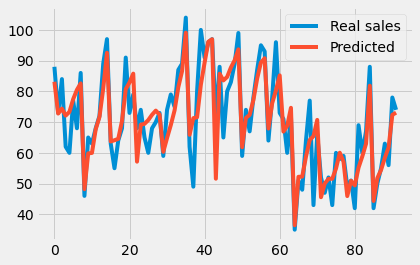

In [121]:
plt.plot(y_item, label = "Real sales");
plt.plot(y_pred, label = "Predicted");
plt.legend(); plt.show();

---